
importing library


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data training preprocessing

In [2]:
training_set =tf.keras.utils.image_dataset_from_directory(
    'E:/DataSet2/data_split/training',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 10817 files belonging to 2 classes.


In [3]:
validation_set =tf.keras.utils.image_dataset_from_directory(
     'E:/DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2703 files belonging to 2 classes.


validation image preprocesssing


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
#for x,y in training_set:
    #print(x,x.shape)
    #print(y,y.shape)
#break

building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D

# Model Definition
model = Sequential()

# First Conv Block
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Second Conv Block
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Third Conv Block
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Fully Connected Layers
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())  # ✅ Replaces Flatten() for lower memory use
model.add(Dense(512, activation='relu'))  # ✅ Reduced from 1500 to 512
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))  # ✅ Softmax is fine for two-class classification

# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' if using one-hot labels
              metrics=['accuracy'])

# Model Summary
model.summary()


E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,278,018 (4.88 MB)

 Trainable params: 1,278,018 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

building convolution layer


training model


In [8]:
training_history_new=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 1414s 4s/step - accuracy: 0.6289 - loss: 0.9243 - val_accuracy: 0.8124 - val_loss: 0.4466
Epoch 2/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 1046s 3s/step - accuracy: 0.8056 - loss: 0.4408 - val_accuracy: 0.8298 - val_loss: 0.4089
Epoch 3/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 636s 2s/step - accuracy: 0.8563 - loss: 0.3579 - val_accuracy: 0.8775 - val_loss: 0.3346
Epoch 4/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.8845 - loss: 0.3105 - val_accuracy: 0.8320 - val_loss: 0.3635
Epoch 5/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.8933 - loss: 0.2949 - val_accuracy: 0.8520 - val_loss: 0.3707
Epoch 6/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.8838 - loss: 0.3175 - val_accuracy: 0.8983 - val_loss: 0.2870
Epoch 7/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.9124 - loss: 0.2605 - val_accuracy: 0.8953 - val_loss: 0.2945
Epoch 8/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.9071 - loss: 0.2625 - val_ac

model evaluation of training set

In [9]:
# Evaluate  the training set
train_loss, train_acc = model.evaluate(training_set)

# Evaluate on the validation set (optional)
val_loss, val_acc = model.evaluate(validation_set)

# Print results
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


339/339 ━━━━━━━━━━━━━━━━━━━━ 185s 545ms/step - accuracy: 0.9116 - loss: 0.2651
85/85 ━━━━━━━━━━━━━━━━━━━━ 46s 541ms/step - accuracy: 0.8942 - loss: 0.2988
Training Loss: 0.2648009657859802, Training Accuracy: 0.9124526381492615
Validation Loss: 0.29944807291030884, Validation Accuracy: 0.8941916227340698


saving model

In [10]:
model.save("trainn_model.keras")

In [11]:
training_history_new.history

{'accuracy': [0.71554034948349,
  0.8235185146331787,
  0.8616991639137268,
  0.887399435043335,
  0.8939632177352905,
  0.9000647068023682,
  0.9090321063995361,
  0.9080151319503784,
  0.911065936088562,
  0.9095867872238159],
 'loss': [0.6219519972801208,
  0.418334424495697,
  0.3523607552051544,
  0.3090420365333557,
  0.2931646704673767,
  0.2862897515296936,
  0.2662057876586914,
  0.2598991394042969,
  0.2541133761405945,
  0.25579068064689636],
 'val_accuracy': [0.8124306201934814,
  0.8298187255859375,
  0.8775434494018555,
  0.8320384621620178,
  0.852016270160675,
  0.8982611894607544,
  0.8953015208244324,
  0.9001109600067139,
  0.8997410535812378,
  0.8941916227340698],
 'val_loss': [0.44662564992904663,
  0.4089115262031555,
  0.33463647961616516,
  0.363472580909729,
  0.37071189284324646,
  0.286960244178772,
  0.2945249676704407,
  0.28717130422592163,
  0.2869264781475067,
  0.2994479537010193]}

In [12]:
#recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history_new.history,f)


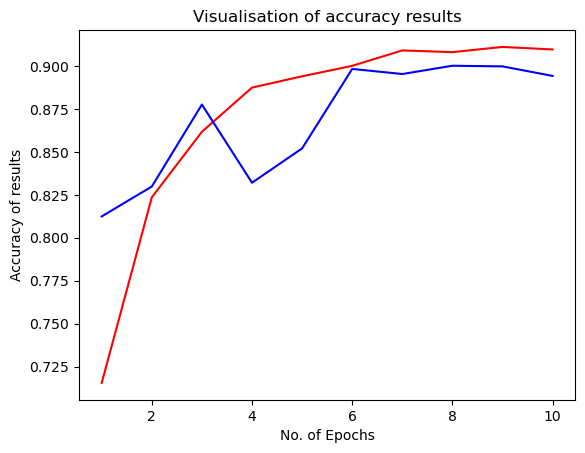

In [13]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history_new.history['accuracy'],color='red', label='Training accuracy')
plt.plot(epochs,training_history_new.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy of results")
plt.title("Visualisation of accuracy results")
plt.show()

In [14]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'E:/DataSet/val',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 6192 files belonging to 2 classes.


In [15]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

194/194 ━━━━━━━━━━━━━━━━━━━━ 115s 588ms/step


(array([[0.7316861 , 0.26831385],
        [0.7316861 , 0.26831385],
        [0.7936574 , 0.20634262],
        ...,
        [0.592825  , 0.40717492],
        [0.592825  , 0.40717492],
        [0.01737876, 0.98262125]], dtype=float32),
 (6192, 2))

In [16]:
predicted_categories =tf.argmax(y_pred,axis=1)
y_pred,y_pred.shape

(array([[0.7316861 , 0.26831385],
        [0.7316861 , 0.26831385],
        [0.7936574 , 0.20634262],
        ...,
        [0.592825  , 0.40717492],
        [0.592825  , 0.40717492],
        [0.01737876, 0.98262125]], dtype=float32),
 (6192, 2))

In [17]:
predicted_categories

<tf.Tensor: shape=(6192,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 1], dtype=int64)>

In [18]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [19]:
true_categories

<tf.Tensor: shape=(6192,), dtype=int32, numpy=array([0, 0, 0, ..., 1, 1, 1])>

In [20]:
Y_true = true_categories  # No need for tf.argmax()
print(Y_true)


tf.Tensor([0 0 0 ... 1 1 1], shape=(6192,), dtype=int32)


In [21]:
print(true_categories.shape)  # Debugging step


(6192,)


In [22]:
from sklearn.metrics import classification_report , confusion_matrix

# Define class names (replace with your actual class labels)
class_name = ['healthy', 'unhealthy']  # Example: Modify based on your dataset

# Generate the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


              precision    recall  f1-score   support

     healthy       0.97      0.97      0.97       943
   unhealthy       0.99      0.99      0.99      5249

    accuracy                           0.99      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.99      0.99      0.99      6192



In [23]:
cm= confusion_matrix(Y_true, predicted_categories)
cm

array([[ 913,   30],
       [  32, 5217]], dtype=int64)

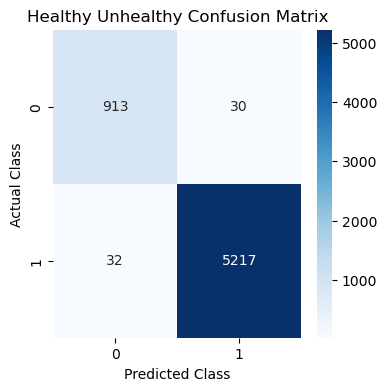

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example usage:
# Assuming Y_true and predicted_categories are defined
cm = confusion_matrix(Y_true, predicted_categories)

# Plot heatmap
plt.figure(figsize=(4, 4))  # Create figure first
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Save the axes to a variable

# Labels and title
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.set_title("Healthy Unhealthy Confusion Matrix")

plt.show()
